<a href="https://colab.research.google.com/github/Zeeshan00789/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [7]:
df.shape

(7787, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.rename(columns={'listed_in':'Genres'}, inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genres', 'description'],
      dtype='object')

In [10]:
#checking duplicate values
df[df.duplicated()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genres          0
description     0
dtype: int64

In [11]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#Handling null values

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
Genres             0
description        0
dtype: int64

In [13]:
df['director'].fillna('no director', inplace=True)
df['cast'].fillna('no cast', inplace=True)
df['country'].fillna('no country', inplace=True)

In [14]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'], inplace=True)

#EDA

In [15]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0, 0.5, 'Type')

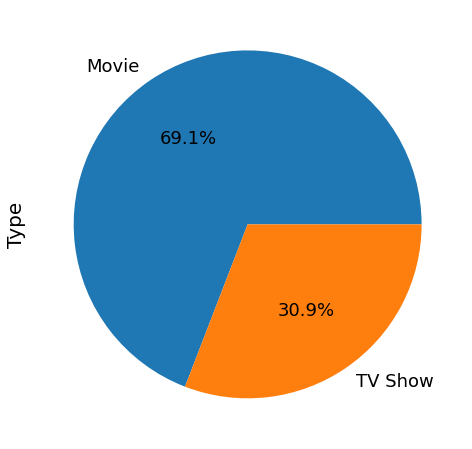

In [16]:
plt.figure(figsize=(10,8))
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 18})
plt.ylabel('Type', fontsize= 20)

#Rating

In [17]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
df['target_ages']=df['rating'].replace({'TV-PG':'Older Kids','TV-MA':'Adults',
                                        'TV-Y7-F7':'Older Kids','TV-Y7':'Older Kids',
                                        'TV-14':'Teens', 'R':'Adults','TV-Y': 'Kids',
                                        'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids',
                                        'PG': 'Older Kids', 'G': 'Kids','UR': 'Adults',
                                        'NC-17': 'Adults'})

In [19]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

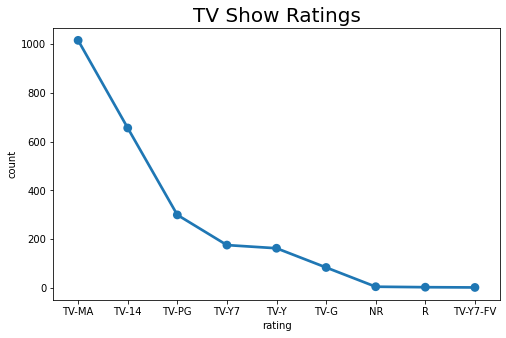

In [20]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()


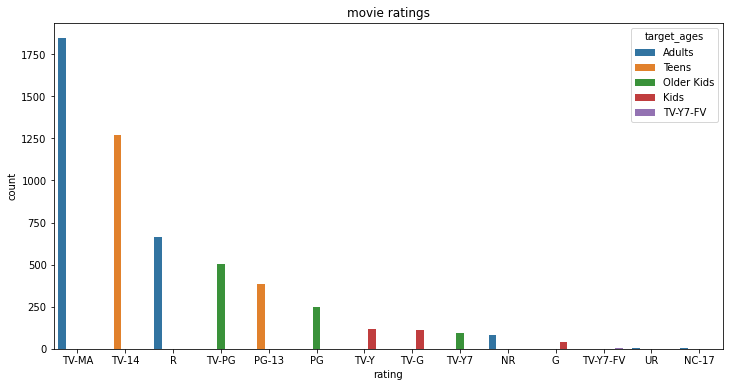

In [21]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(12,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

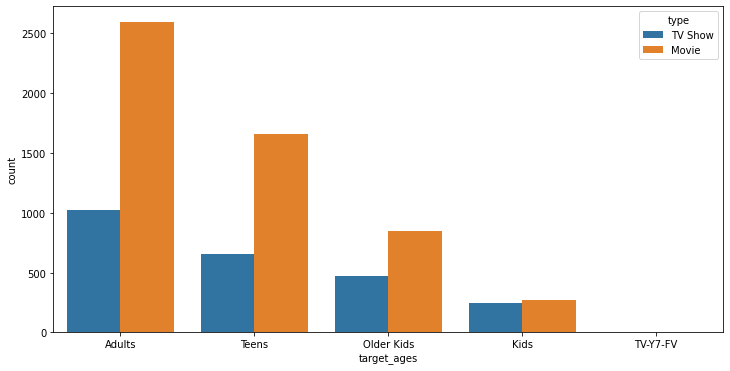

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='target_ages',hue='type', data=df)

#Release Year

In [23]:
rels=df.groupby(['release_year','type']).agg({'type':'count'}).sort_index(ascending=False)


rels

type
release_year type         
2021         TV Show    19
             Movie      12
2020         TV Show   457
             Movie     411
2019         TV Show   414
...                    ...
1945         Movie       3
1944         Movie       3
1943         Movie       3
1942         Movie       2
1925         TV Show     1

[118 rows x 1 columns]

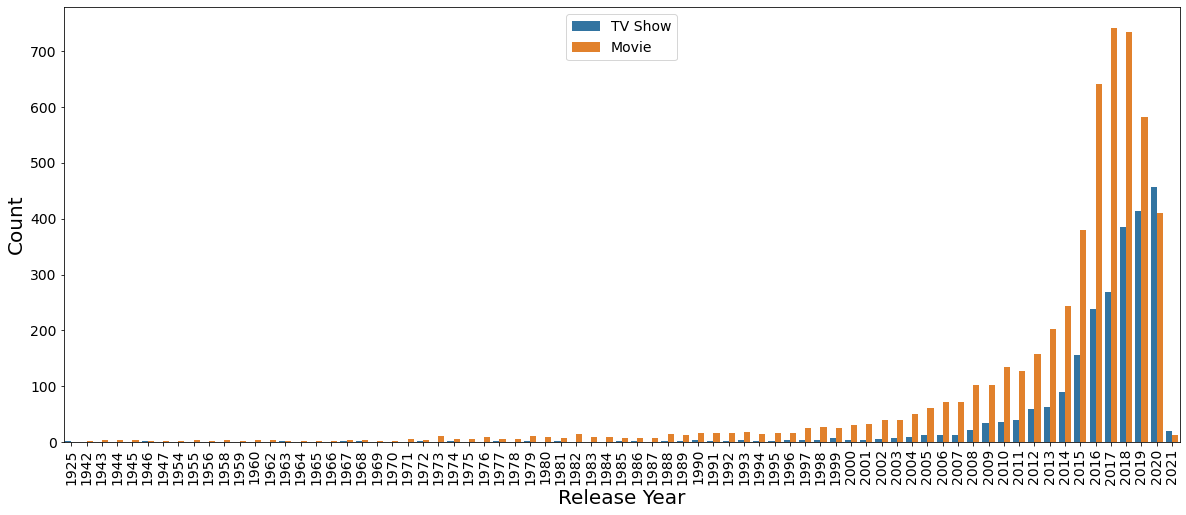

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x='release_year',hue='type', data=df)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend(loc='upper center',fontsize=14)

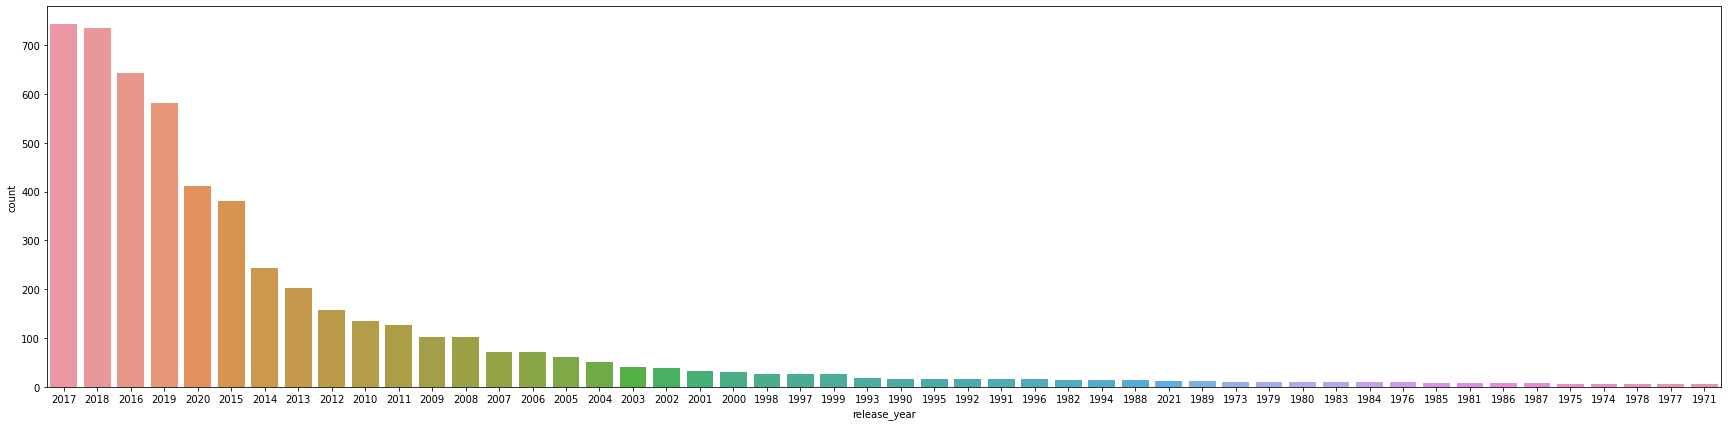

In [25]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(30,7))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:50])

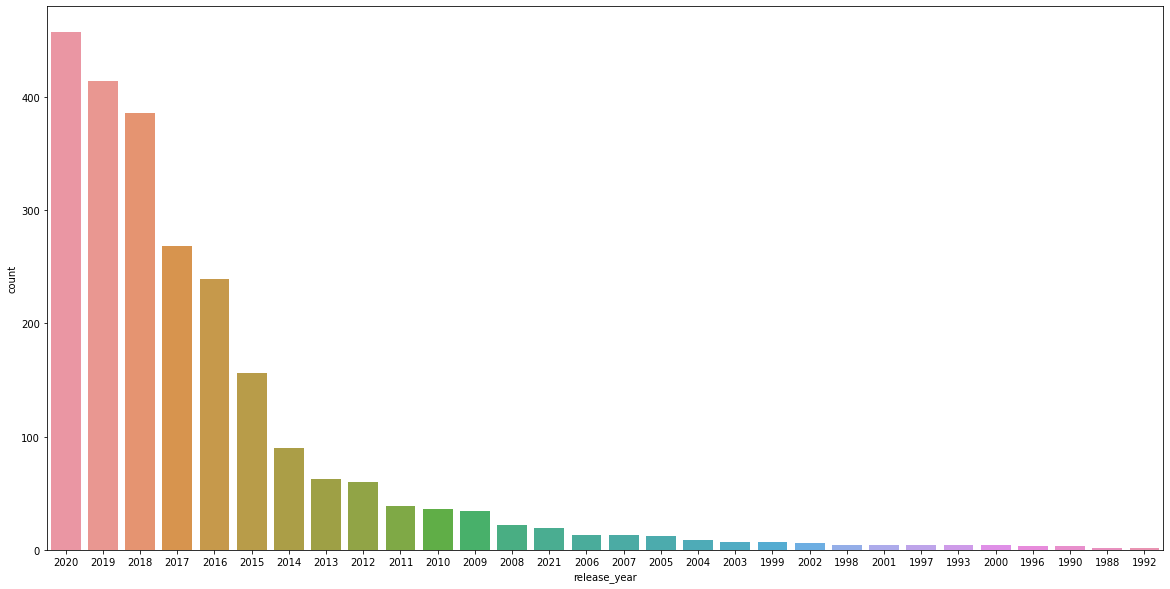

In [26]:
#Analysing how many TV Shows released per year in last 20 years
plt.figure(figsize=(20,10))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:30])

In [27]:

# Put the data into bins.
release_yr_bin = pd.cut(df.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


([<matplotlib.patches.Wedge at 0x7f5ae4c0dfa0>,
 [Text(-1.8826303316379225, 1.1382895213419504, '(2010, 2021]'),
  Text(1.6461791496207738, -1.4594842264833927, '(1999, 2010]'),
  Text(2.1638465593802154, -0.39720028632719206, '(1924, 1999]')],
 [Text(-1.0268892718025031, 0.6208851934592455, '82.7%'),
  Text(0.8979158997931492, -0.7960823053545777, '11.5%'),
  Text(1.1802799414801175, -0.21665470163301384, '5.8%')])

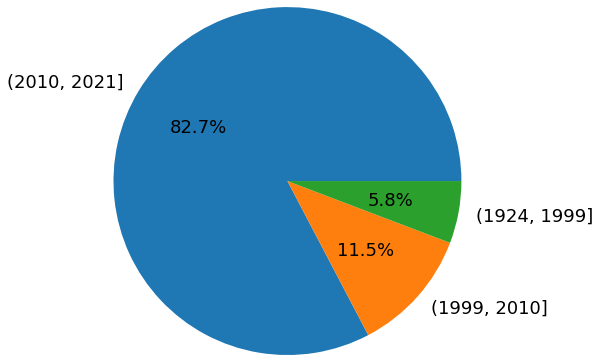

In [28]:
# Plot contain according to release year
values=release_yr_bin['count']
labels=release_yr_bin['year_interval']
plt.pie(values, labels=labels,radius=2, autopct='%1.1f%%',textprops={'fontsize': 18})

* 96% of the content available was released between 2010 and 2021.
* 3.96% of the content available was released before 2010.

#Movies and TV shows added to netflix each year

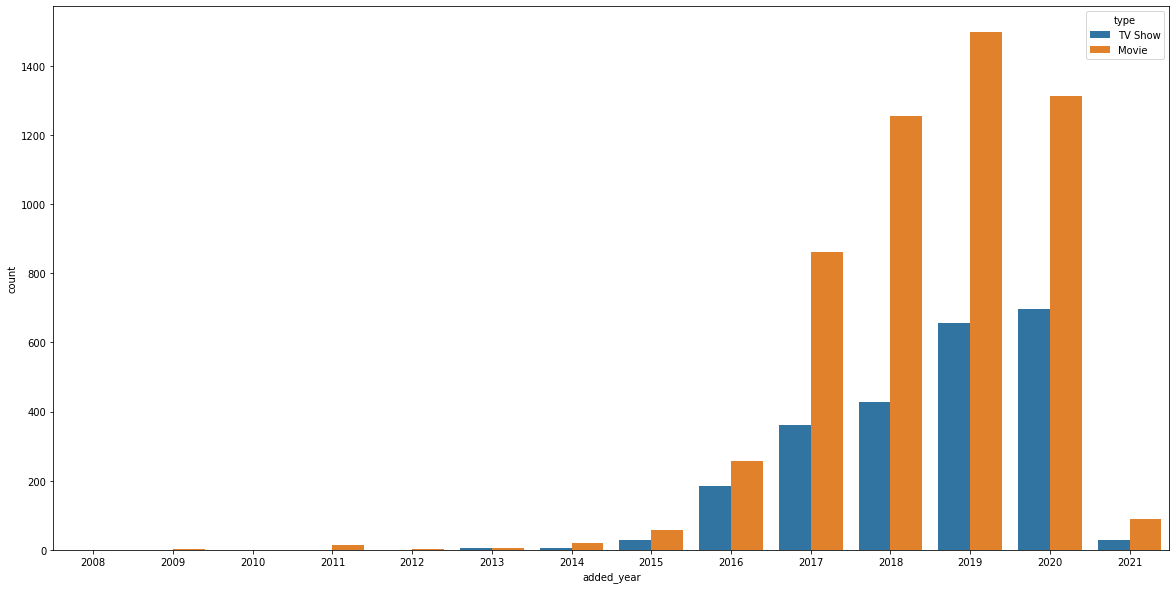

In [29]:
# Creating 'year' column
df['added_year'] =pd.to_datetime (df['date_added']).dt.year
#plotting barplot for each year
plt.figure(figsize = (20,10))
sns.countplot(x='added_year', hue='type',data=df)


The number of shows and movies added are maximum for year 2019 and 2020, number of shows decreased for year 2021.

#Genres

#Movies genres

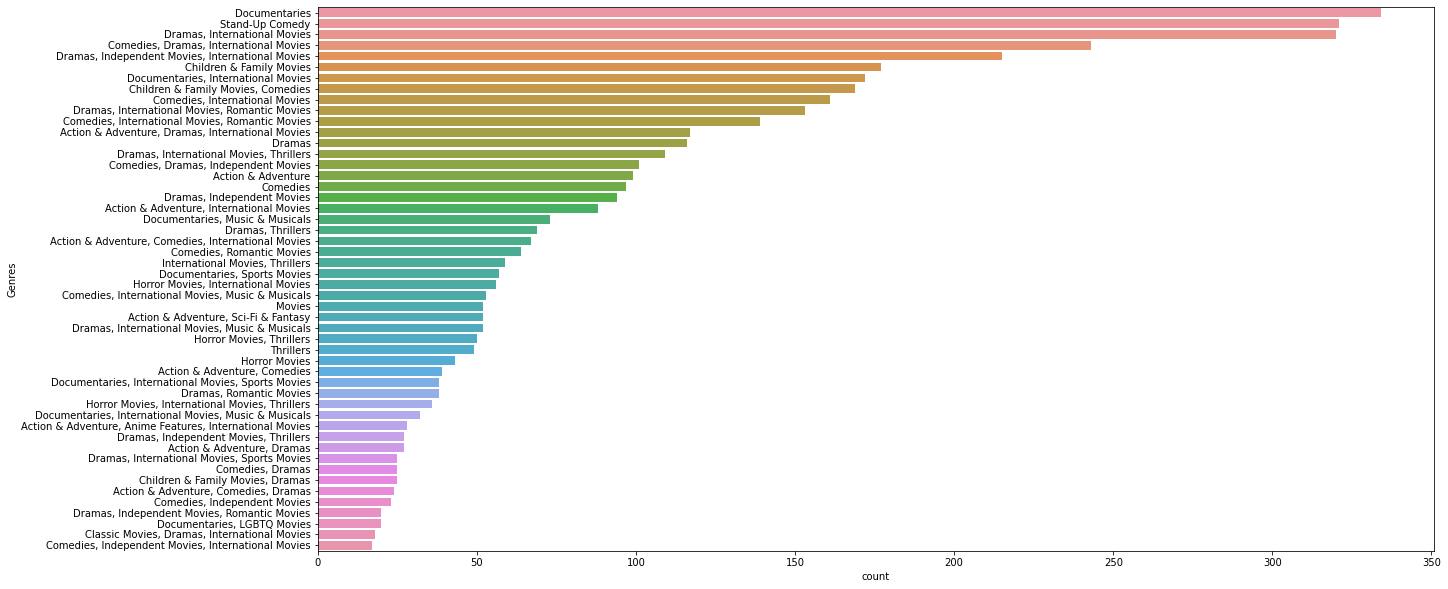

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(y=movies['Genres'],order=movies['Genres'].value_counts().index[0:50])


#TV Shows genres

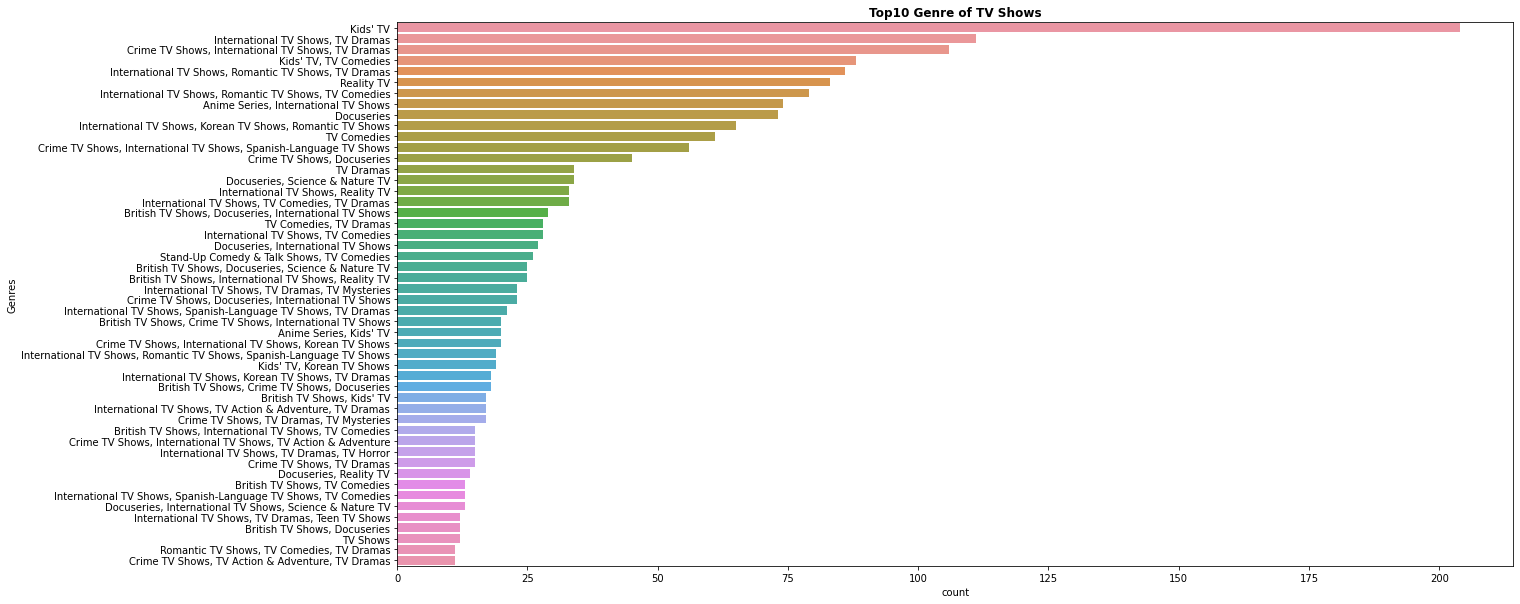

In [31]:

# Analysing top 50 genres of TV SHOWS
plt.figure(figsize=(20,10))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['Genres'],data=tv_shows,order=tv_shows['Genres'].value_counts().index[0:50])

#Duration

##For movies

Text(0.5, 1.0, 'Distplot with Normal distribution for Movies')

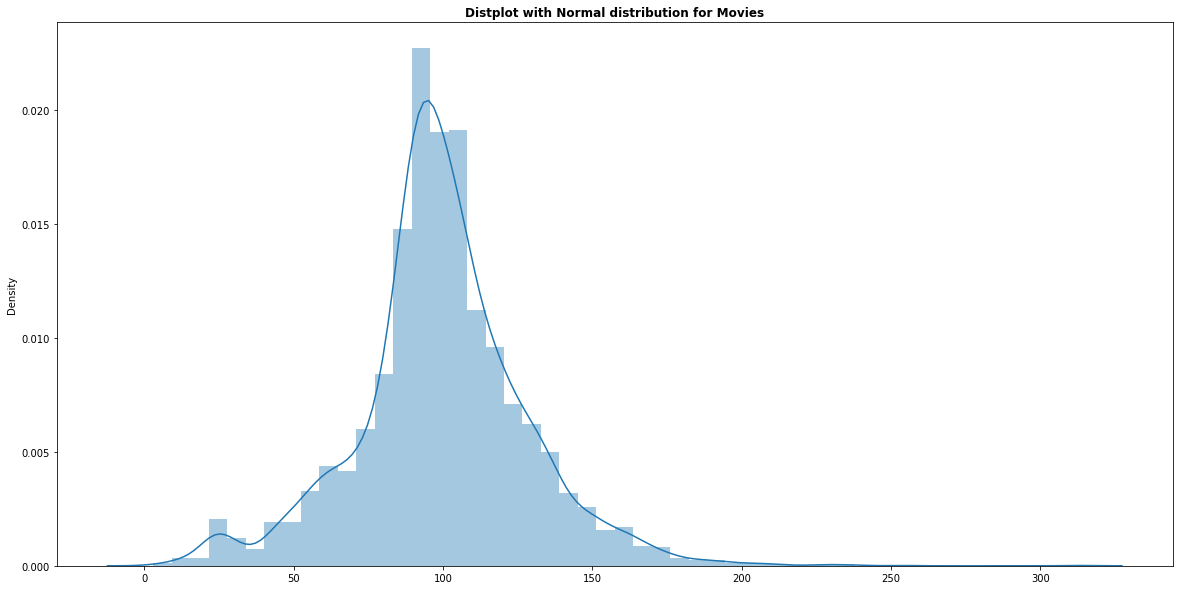

In [32]:
plt.figure(figsize=(20,10))
sns.distplot(movies['duration'].str.extract('(\d+)'))
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

##For TV shows

Text(0.5, 1.0, 'Distplot with Normal distribution for Movies')

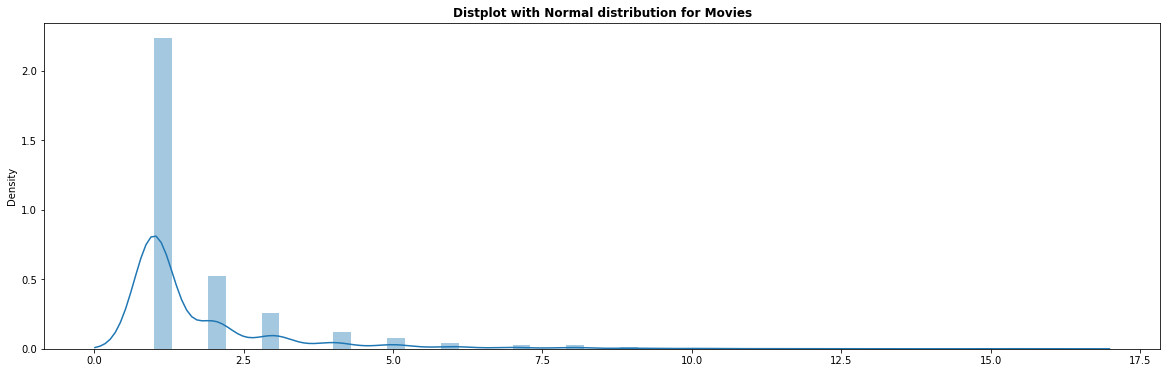

In [33]:
plt.figure(figsize=(20,6))
sns.distplot(tv_shows['duration'].str.extract('(\d+)'))
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

In [34]:

# Groupby multiple columns & multiple aggregations
result = df.groupby('type').aggregate({'duration':'count'})
print(result)


         duration
type             
Movie        5372
TV Show      2398


##Movies duration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

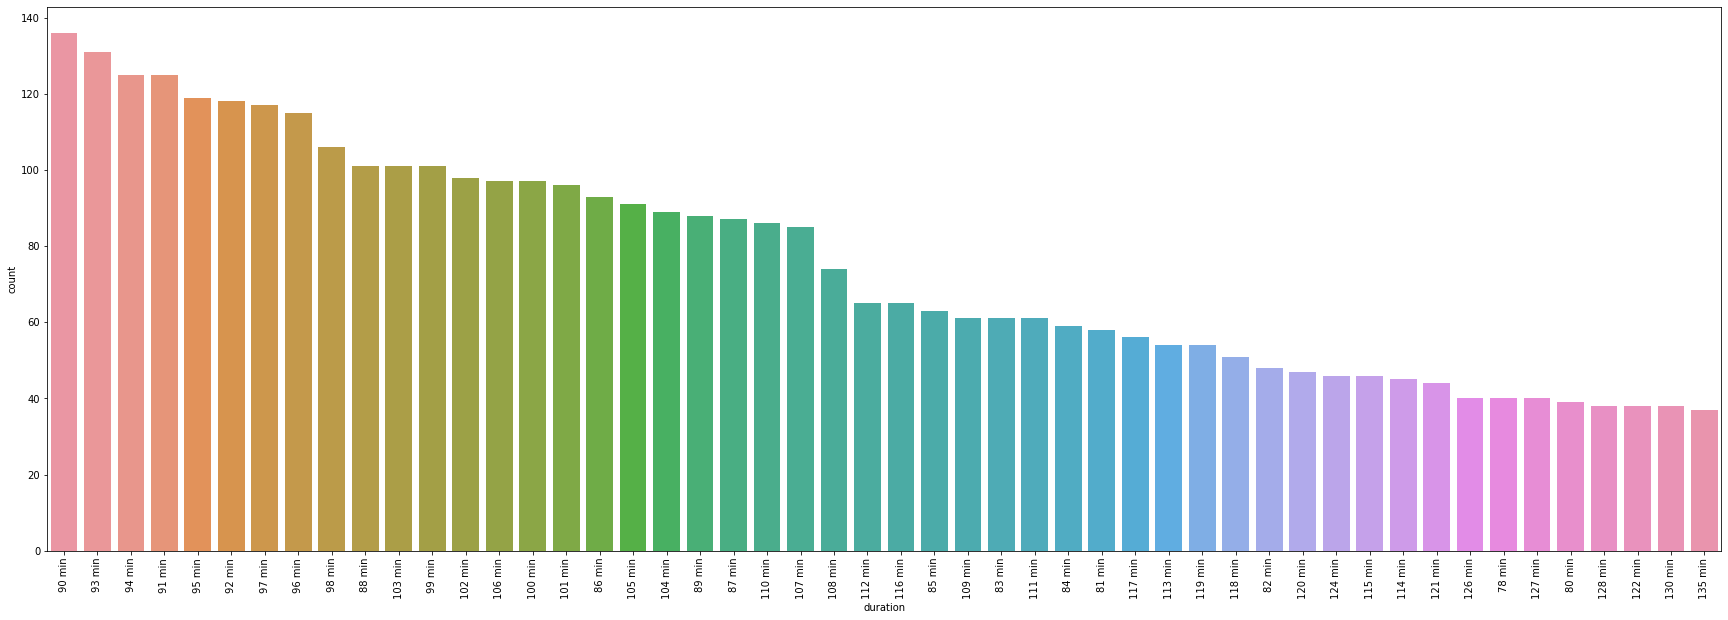

In [36]:
plt.figure(figsize=(30,10))


sns.countplot(x=movies['duration'], data=movies,order= movies['duration'].value_counts().index[0:50])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

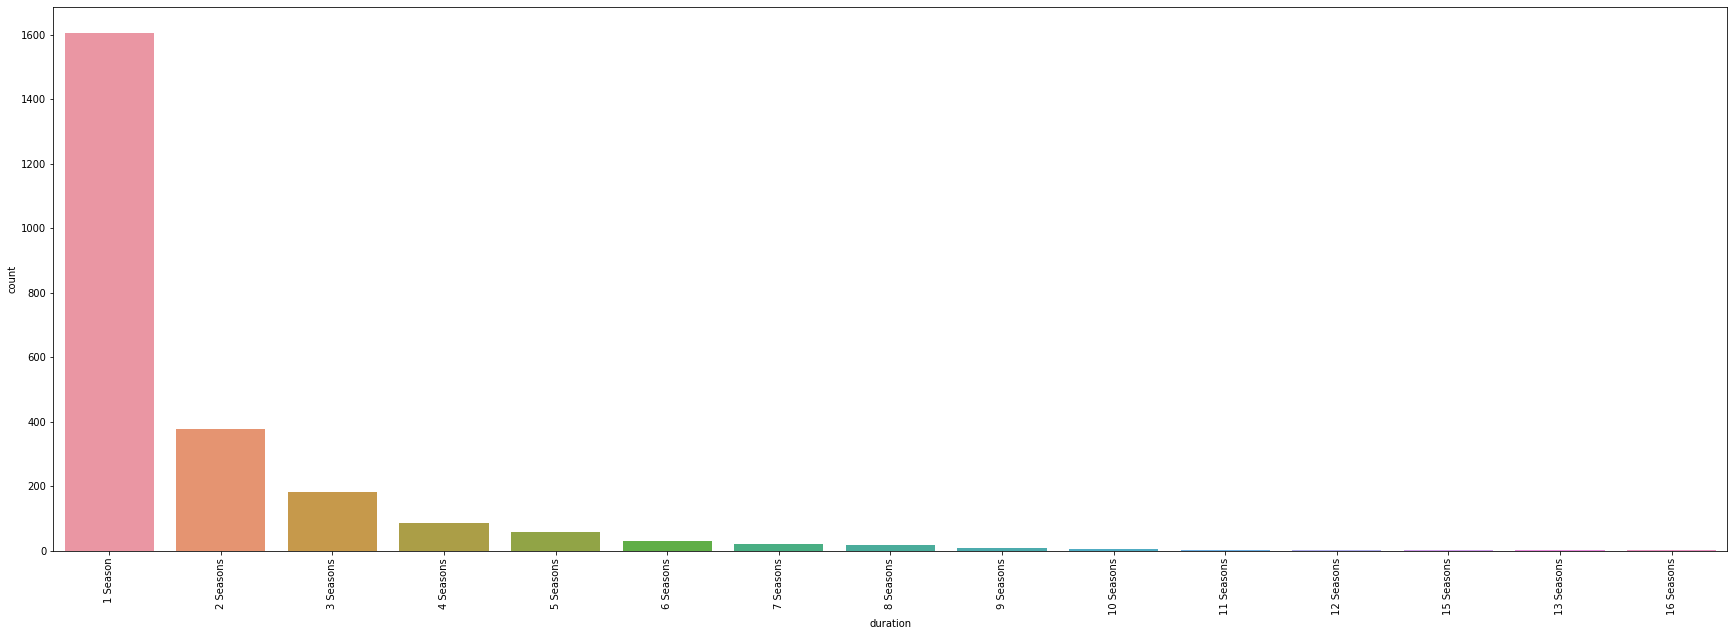

In [40]:
plt.figure(figsize=(30,10))


sns.countplot(x=tv_shows['duration'], data=tv_shows,order= tv_shows['duration'].value_counts().index[0:50])
plt.xticks(rotation=90)

#Country

##Top 30 country

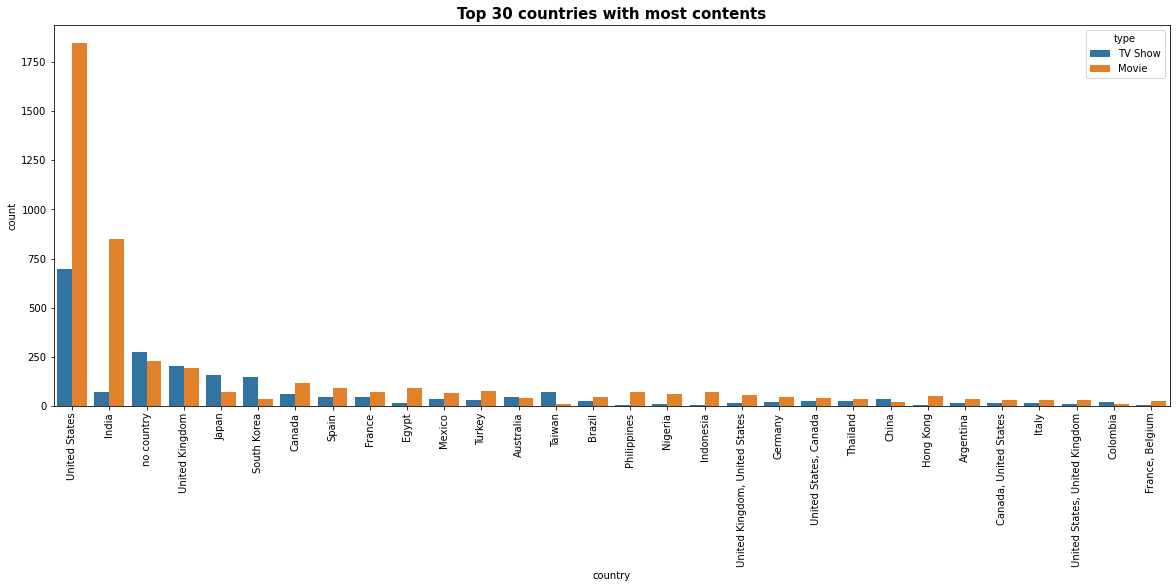

In [48]:
plt.figure(figsize=(20,7))

sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:30],hue=df['type'])
plt.xticks(rotation=90)
plt.title('Top 30 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [49]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description,target_ages,added_year
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020


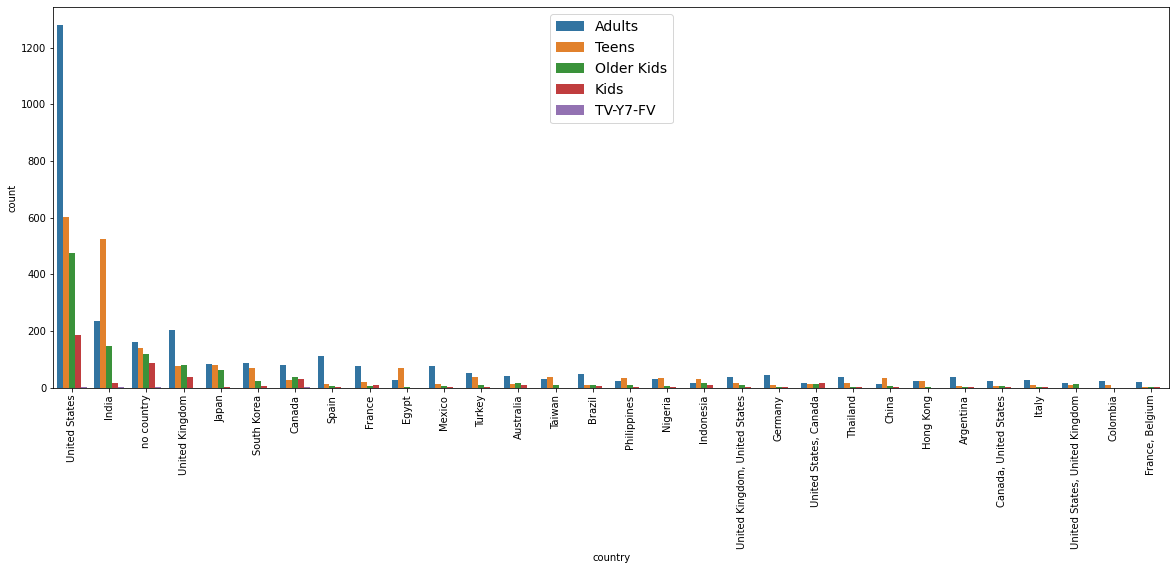

In [57]:
plt.figure(figsize=(20,7))

sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:30],hue=df['target_ages'])
plt.xticks(rotation=90)
plt.legend(loc='upper center',fontsize=14)